# Predictive Maintenance and Abnormality Detection in Running Pumps

Dataset Reference: https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

Dataset contains sensors reading of pump running data.<br> Datapoints has been labled as "Normal" for running and "Recovering" for abnormal readings.

Let's create a Supervised ML model to predict abnormility and validating the model.<br>
We will also create an Unsupervised ML model to predict abnormility using datasets and also validating with true target variables.

### Importing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, classification_report, mean_squared_error
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams.update({'font.size': 12})
ss = StandardScaler()

In [2]:
df = pd.read_csv("D:\Intellipat\Projects\Pump\pump_sensor.csv")
df.sample(5)

Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
18814        18814  2018-04-14 01:34:00   2.429977   49.86979   51.60590   
113235      113235  2018-06-18 15:15:00   2.399479   49.30555   51.04166   
108599      108599  2018-06-15 09:59:00   2.508681   48.22049   50.13021   
95781        95781  2018-06-06 12:21:00   2.485070   49.43576   53.25521   
80763        80763  2018-05-27 02:03:00   2.448669   47.56944   52.82118   

        sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
18814   43.880207   631.8287   82.60078   11.58854   16.21094  ...   47.91666   
113235  42.404510   611.6898   76.18489   13.55613   15.63223  ...   42.96875   
108599  42.317707   633.5648   74.08287   13.49826   15.95775  ...   45.57291   
95781   43.576385   631.3657   80.44010   13.41146   15.85648  ...   47.91666   
80763   44.097221   630.2084   74.15649   13.34635   15.87095  ...   40.36458   

        sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
18814   37.326389  55.266200  50.925930  39.641200  157.40740  48.032406   
113235  43.113430  44.849540  49.189820  52.372684  108.21760  62.789350   
108599  39.641200  39.641205  44.849540  54.108800   98.09028  52.372684   
95781   42.245370  41.666670  46.296295  45.138889  107.34950  53.240742   
80763   37.326390  34.722220  37.326390  43.113430  176.79400  50.347220   

        sensor_50  sensor_51  machine_status  
18814    221.9329   193.8657          NORMAL  
113235   195.6019   212.3843          NORMAL  
108599   212.6736   223.3796          NORMAL  
95781    207.1759   191.2616          NORMAL  
80763    183.7384   191.2616          NORMAL  

[5 rows x 55 columns]

### Feature Engineering

In [3]:
df.index = df['timestamp']
df.index = pd.to_datetime(df.index)
df = df.drop(columns=["Unnamed: 0",'timestamp',"sensor_15",'sensor_50'])

In [4]:
df.isna().sum()

sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
sensor_40            27
sensor_41            27
sensor_42       

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 195815 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       195815 non-null  float64
 1   sensor_01       195815 non-null  float64
 2   sensor_02       195815 non-null  float64
 3   sensor_03       195815 non-null  float64
 4   sensor_04       195815 non-null  float64
 5   sensor_05       195815 non-null  float64
 6   sensor_06       195815 non-null  float64
 7   sensor_07       195815 non-null  float64
 8   sensor_08       195815 non-null  float64
 9   sensor_09       195815 non-null  float64
 10  sensor_10       195815 non-null  float64
 11  sensor_11       195815 non-null  float64
 12  sensor_12       195815 non-null  float64
 13  sensor_13       195815 non-null  float64
 14  sensor_14       195815 non-null  float64
 15  sensor_16       195815 non-null  float64
 16  sensor_17       195815

In [7]:
df.describe().T

count        mean         std        min         25%  \
sensor_00  195815.0    2.391576    0.371656   0.000000    2.444734   
sensor_01  195815.0   48.061065    2.465014   0.000000   46.614580   
sensor_02  195815.0   51.544084    2.417149  33.810760   50.781246   
sensor_03  195815.0   44.162936    1.766852  33.289930   43.185760   
sensor_04  195815.0  620.809288   72.147715   3.029514  628.472168   
sensor_05  195815.0   73.779449   12.449814   0.000000   69.911855   
sensor_06  195815.0   13.757032    1.496647   0.014468   13.382520   
sensor_07  195815.0   16.077282    1.415956   0.000000   15.957750   
sensor_08  195815.0   15.390878    1.373700   0.028935   15.183740   
sensor_09  195815.0   15.004646    1.353784   0.007234   15.053530   
sensor_10  195815.0   43.747761    7.891515   0.000000   41.478590   
sensor_11  195815.0   44.496441    9.207425   0.000000   40.719135   
sensor_12  195815.0   30.791022    7.808721   0.000000   29.835335   
sensor_13  195815.0    7.619493    6.868970   0.000000    1.797635   
sensor_14  195815.0  377.243808  113.444523  32.409550  418.419350   
sensor_16  195815.0  416.677898  126.150886   0.000000  459.792300   
sensor_17  195815.0  421.345228  129.249551   0.000000  454.965300   
sensor_18  195815.0    2.306301    0.759510   0.000000    2.456296   
sensor_19  195815.0  591.606287  198.975135   0.000000  663.070900   
sensor_20  195815.0  361.155365  101.884094   0.000000  398.158000   
sensor_21  195815.0  796.594620  226.706965  95.527660  875.797900   
sensor_22  195815.0  460.947932  154.993219   0.000000  479.909850   
sensor_23  195815.0  925.109386  291.464283   0.000000  951.205350   
sensor_24  195815.0  557.047555  182.099646   0.000000  602.627850   
sensor_25  195815.0  649.847264  220.614759   0.000000  695.556650   
sensor_26  195815.0  786.220081  246.172813  43.154790  795.112400   
sensor_27  195815.0  502.258240  161.481546   0.000000  448.250000   
sensor_28  195815.0  840.342186  310.506857  13.945460  776.794050   
sensor_29  195815.0  584.322957  227.180043   0.848722  530.540300   
sensor_30  195815.0  613.687328  196.881420   0.000000  629.166600   
sensor_31  195815.0  858.167916  279.708700  23.958330  835.416600   
sensor_32  195815.0  805.467443  256.675309   0.240716  783.841150   
sensor_33  195815.0  486.539553  150.095379   6.460602  489.913000   
sensor_34  195815.0  233.374537   88.492536  54.882370  171.937500   
sensor_35  195815.0  423.486094  140.704853   0.000000  349.159250   
sensor_36  195815.0  589.130267  291.043399   2.260970  261.879550   
sensor_37  195815.0   60.342473   38.356778   0.000000   26.791505   
sensor_38  195815.0   50.455800    9.607789  27.343748   45.833330   
sensor_39  195815.0   36.682830   12.546264  22.656250   32.812500   
sensor_40  195815.0   70.875282   18.832162  27.343748   59.114580   
sensor_41  195815.0   35.684810    7.156343  23.958330   32.812500   
sensor_42  195815.0   35.510738    7.295794  25.781250   32.812500   
sensor_43  195815.0   44.406062    8.480396  28.906250   40.364580   
sensor_44  195815.0   43.428242   11.729310  28.645830   37.615740   
sensor_45  195815.0   43.867143   12.785820  28.935180   37.615740   
sensor_46  195815.0   48.907728   14.806393  30.671297   41.087960   
sensor_47  195815.0   45.067618   10.447308  30.960648   39.641200   
sensor_48  195815.0  161.025062   80.061090  27.199070   94.039350   
sensor_49  195815.0   58.732971   18.823896  27.777779   48.900460   
sensor_51  195815.0  198.362896   64.971775  28.067129  180.555600   

                  50%          75%          max  
sensor_00    2.456539     2.499826     2.549016  
sensor_01   48.220486    49.522570    56.727430  
sensor_02   51.866318    52.907990    56.032990  
sensor_03   44.444440    45.399300    48.220490  
sensor_04  633.449097   637.963013   674.768494  
sensor_05   75.059710    79.975710    99.999880  
sensor_06   13.650170    14.576100    21.390340  
sensor_07   16.167530    16.471350    23.59

In [8]:
data = df.copy()

In [9]:
y_true = df.iloc[:,-1]
y_true = y_true.map({'NORMAL':0, 'RECOVERING':1, 'BROKEN':2})

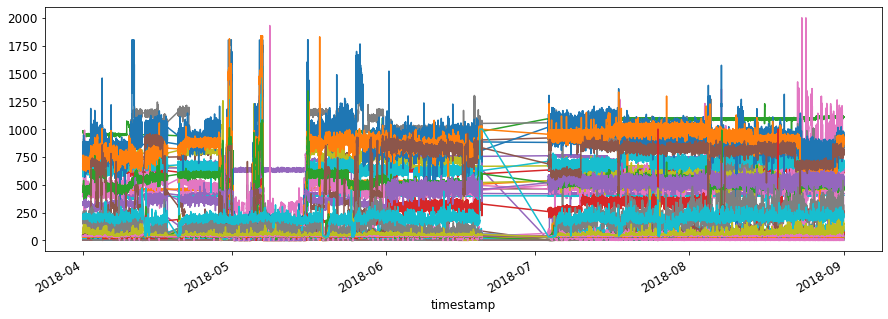

In [10]:
plt.figure(figsize=(15,5))
for i in df.columns[:-1]:
    df[i].plot()

## Anomaly detection using Supervised Learning

### Feature Engineering

In [11]:
df['machine_status'].value_counts()

NORMAL        192769
RECOVERING      3040
BROKEN             6
Name: machine_status, dtype: int64

So, we have an unbalanced data, but supervised learning we have to covert these to balanced data.<br>
Lets use downsampling.

In [12]:
df_random = df[df['machine_status']=='NORMAL'].sample(3040)

In [13]:
df = pd.concat([df_random,df[(df['machine_status'] == 'RECOVERING') | (df['machine_status'] == 'BROKEN')]])

In [14]:
df['machine_status'].value_counts()

NORMAL        3040
RECOVERING    3040
BROKEN           6
Name: machine_status, dtype: int64

<AxesSubplot:>

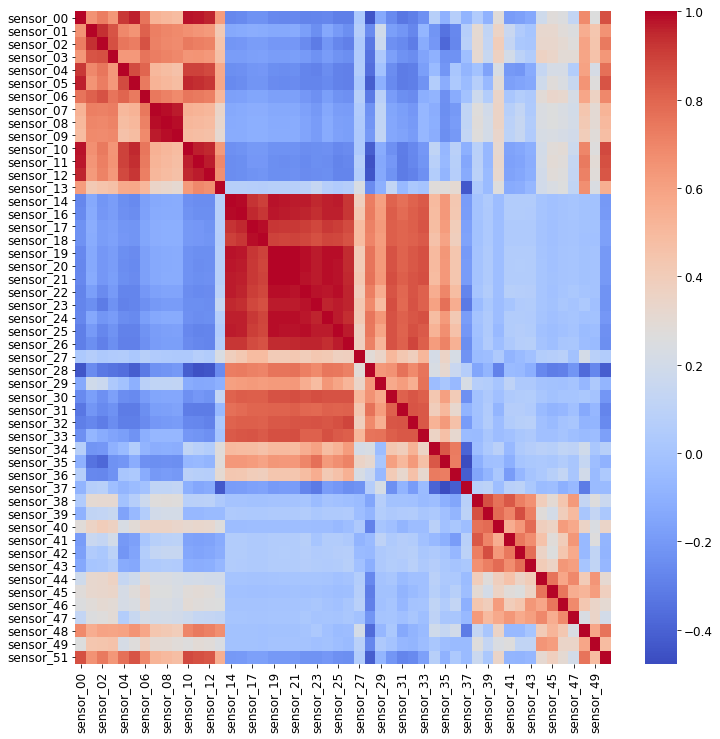

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='coolwarm')

<AxesSubplot:>

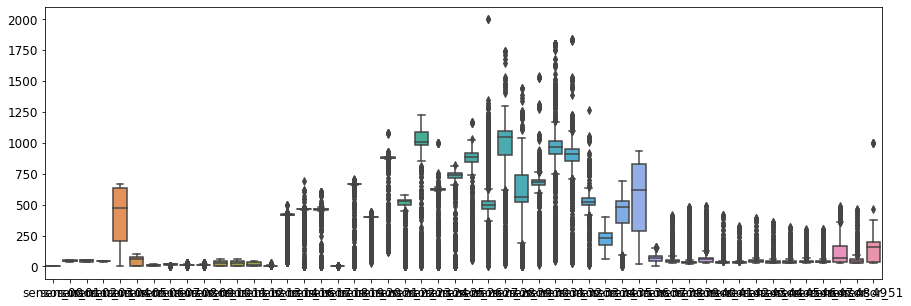

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(df.iloc[:,:-1])

Now, we have a banlance datset (ignoring 'Broken' datapoints), but from heatmap we can see that the data has a lot of multicollinearity within it.<br>
Box plot indicates that there are also a lot of outliers in the dataset but since we are dealing with detecting the failure, we need to analyse these datapoints. 

### Removing Multicollienarity using Variation Inflation Factor

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
vif = vif = pd.DataFrame([100], columns=['VIF'])
while vif['VIF'].max()>20:
    vif = pd.DataFrame()
    vif['Features']=df.columns[:-1]
    vif['VIF'] = [variance_inflation_factor(df.iloc[:,:-1].values,i) 
                          for i in range(len(vif.Features))]
    ind = vif['VIF'].sort_values(ascending=False).index[0]
    df = df.drop(columns=df.columns[ind])

In [19]:
vif

Features        VIF
0   sensor_05  17.915226
1   sensor_06  14.724380
2   sensor_09   9.837211
3   sensor_12  18.331655
4   sensor_13   3.909526
5   sensor_27  18.837935
6   sensor_29  16.346781
7   sensor_36   6.856881
8   sensor_37   7.193310
9   sensor_39   9.857795
10  sensor_40  16.979590
11  sensor_41  10.613770
12  sensor_45  15.525137
13  sensor_47  17.934612
14  sensor_48  10.971865
15  sensor_49   9.614009
16  sensor_51  16.908351

<AxesSubplot:>

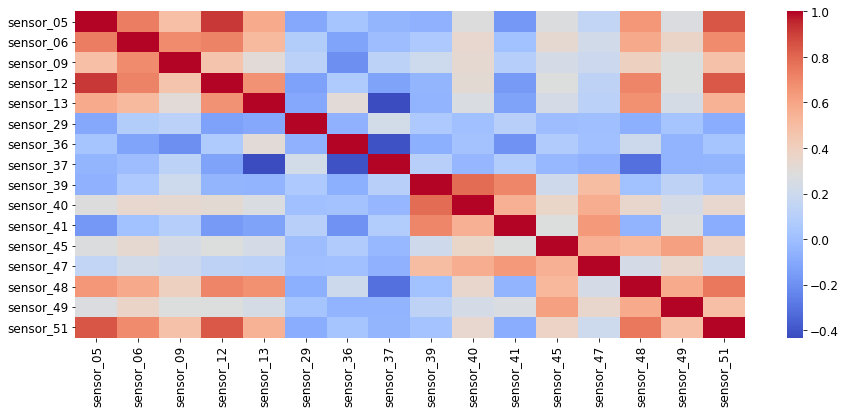

In [20]:
sns.heatmap(df.corr(), cmap='coolwarm')

Now, the dataset has very minimum colinearity.

### Splitting datasets for training and testing & scalling for model training

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], train_size=0.8, random_state=0, stratify=df.iloc[:,-1])

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4868, 16), (1218, 16), (4868,), (1218,))

In [23]:
y_train.value_counts()

RECOVERING    2432
NORMAL        2431
BROKEN           5
Name: machine_status, dtype: int64

In [24]:
ss = StandardScaler()
le = LabelEncoder()

In [25]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [26]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Using Random Forest Classifier for creating a Machine Learning model 

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
y_pred = rfc.predict(X_test)

In [30]:
rfc.score(X_test,y_test)

0.9958949096880131

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       609
           2       0.99      1.00      1.00       608

    accuracy                           1.00      1218
   macro avg       0.66      0.66      0.66      1218
weighted avg       1.00      1.00      1.00      1218



C:\Users\akpra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akpra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akpra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Random Forest Classifier achieves high accuracy, indicating that sensor data and the engineered features effectively differentiate pump states.

#### Classification report indicates that our model is predicting the pump failure with about 100% accuracy from the sensors valve.

Let's test the model on random datapoints:

In [32]:
val = df.sample()
# val = df[df['machine_status']=='NORMAL'].sample()
val.iloc[:,-1]

timestamp
2018-07-03 19:14:00    RECOVERING
Name: machine_status, dtype: object

In [33]:
X_test = val.iloc[:,:-1]
X_test = ss.transform(X_test)

In [34]:
le.inverse_transform(rfc.predict(X_test))

array(['RECOVERING'], dtype=object)

It evedent that the Random Forest Classifier is working fine with sensor data to predict the abnormality in pump running conditions.

Let's create the model using Unsupervised Learning and verify the detected anomaly with the actual condition.

## ***Anomaly detection using Unsupervised Learning***

### Anomaly detection using ADTK

### Feature Engineering

In [35]:
df = data.copy()

In [36]:
y_true = df.iloc[:,-1]
y_true = y_true.map({'NORMAL':0, 'RECOVERING':1, 'BROKEN':2})

In [37]:
df = df.iloc[:,:-1]

In [38]:
X_train = df.iloc[:5000,:]
X_test = df.iloc[5000:,:]

In [39]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [40]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [41]:
X_train.index = df.iloc[:5000,:].index
X_test.index = df.iloc[5000:,:].index

In [42]:
print(X_train.index.is_monotonic_increasing)

True


In [43]:
X_train = X_train.sort_index()

### Creating a model using ADTK library for analysing time series data

In [44]:
from adtk.detector import PersistAD, PcaAD, InterQuartileRangeAD
persist_ad = PersistAD(window=3, min_periods=3,)
iqr_ad = InterQuartileRangeAD(c=1.5)

In [45]:
anomalies_persist = persist_ad.fit_detect(X_train)
anomalies_iqr = iqr_ad.fit_detect(X_train)

In [46]:
combined_anomalies = anomalies_iqr & anomalies_persist

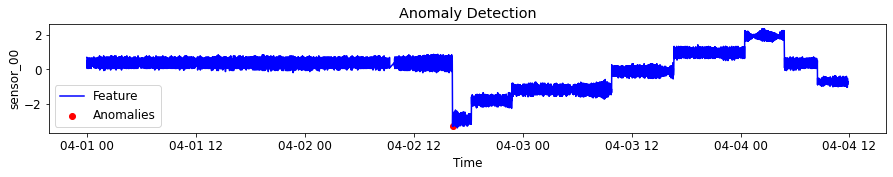

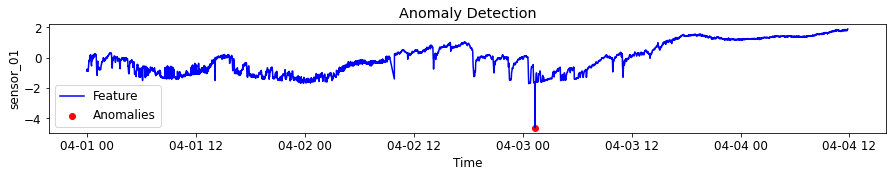

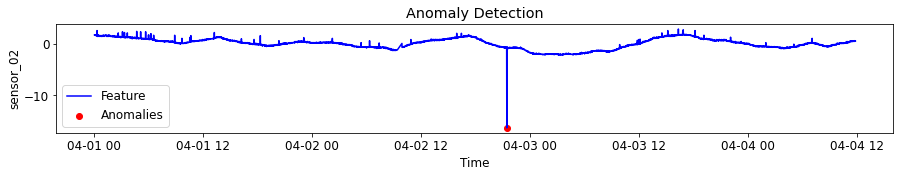

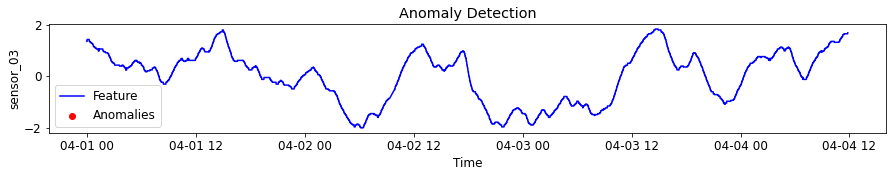

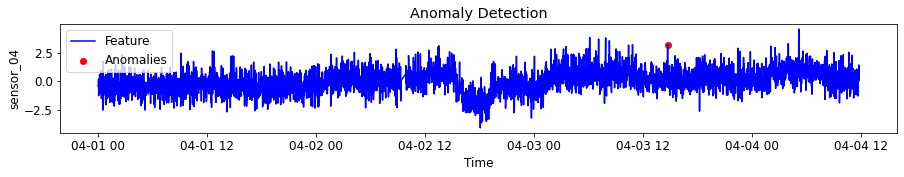

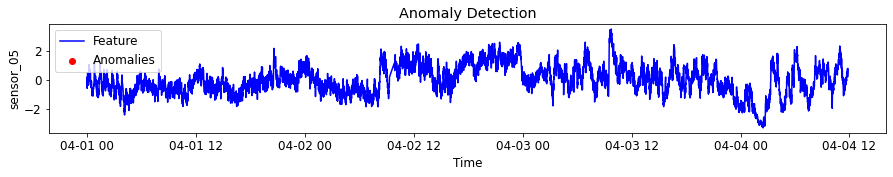

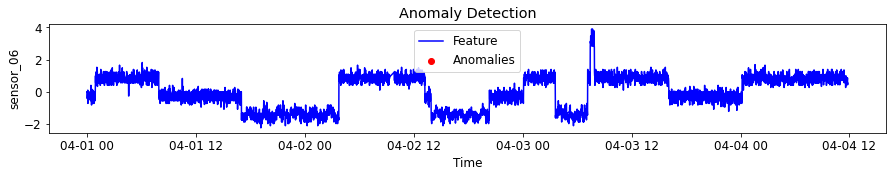

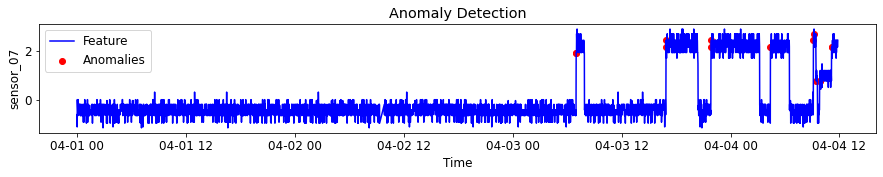

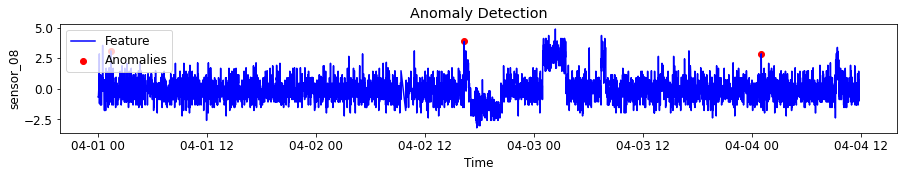

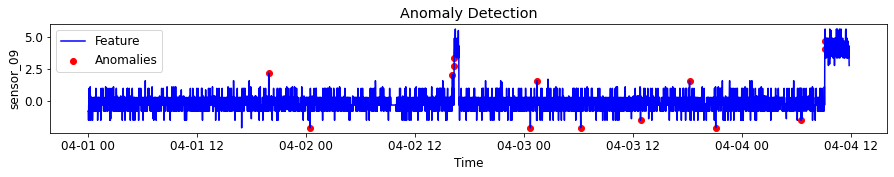

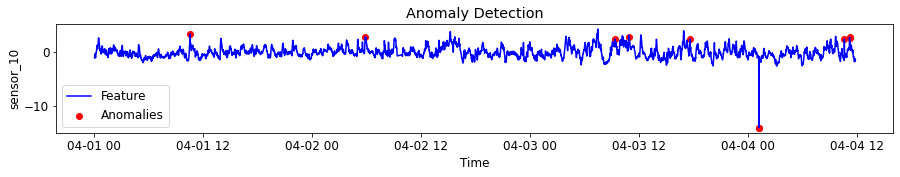

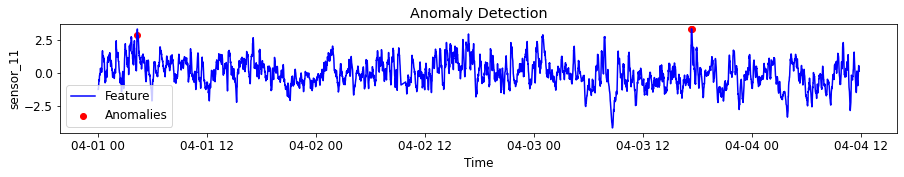

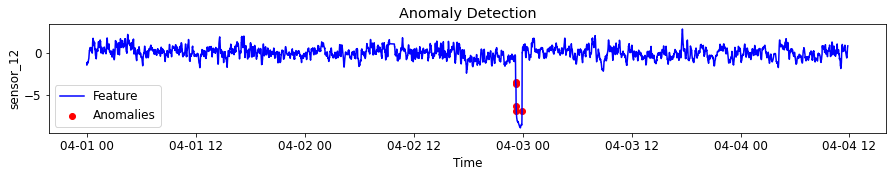

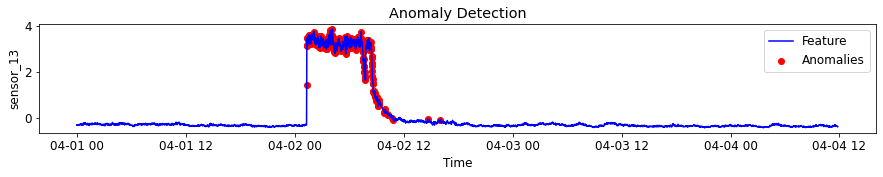

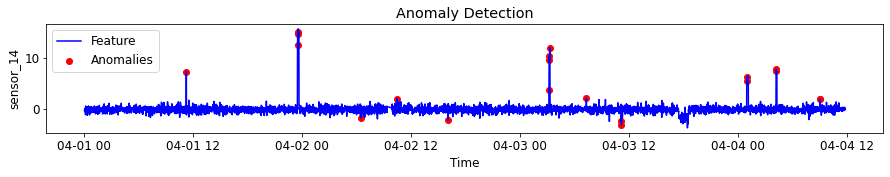

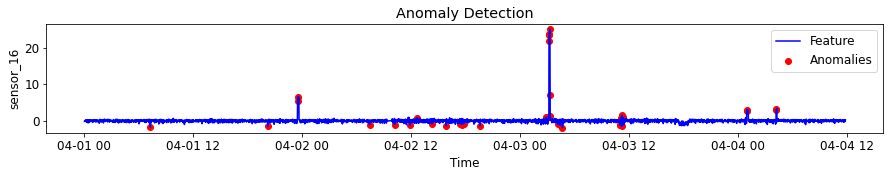

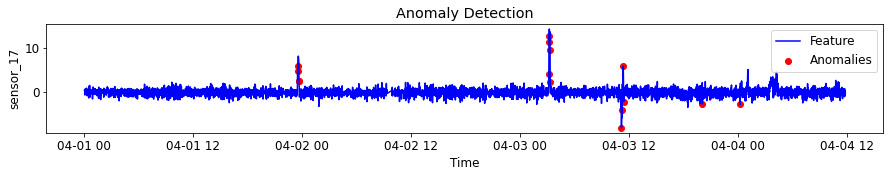

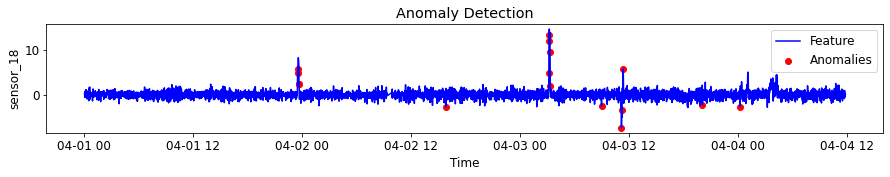

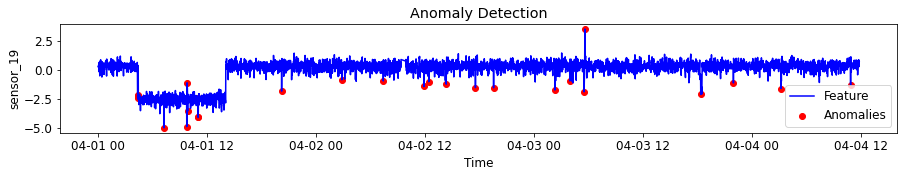

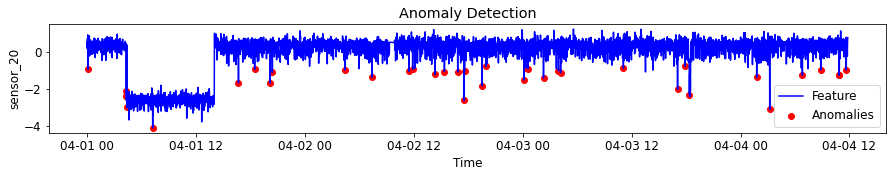

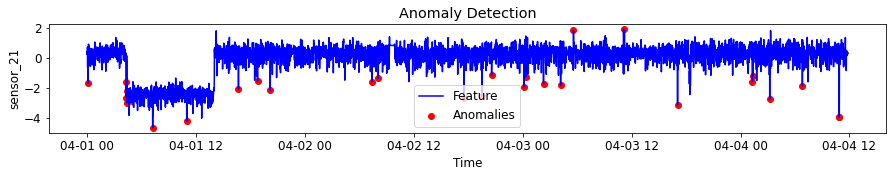

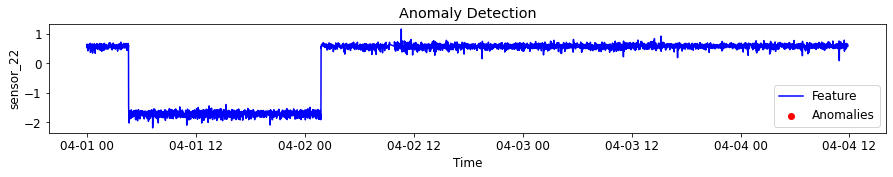

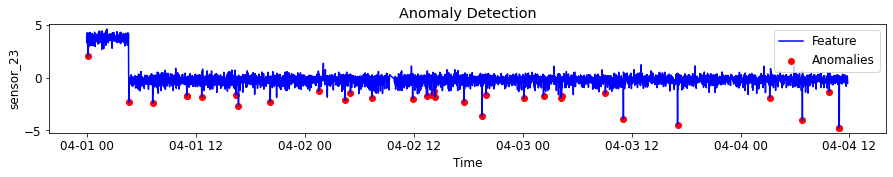

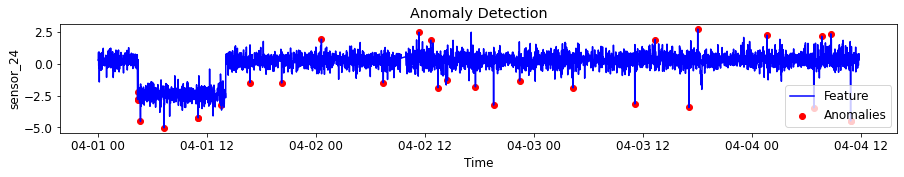

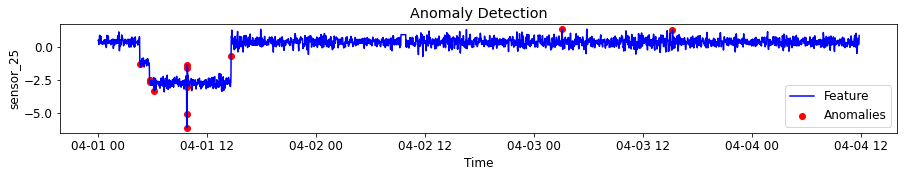

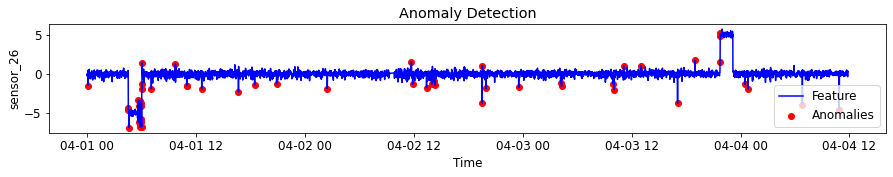

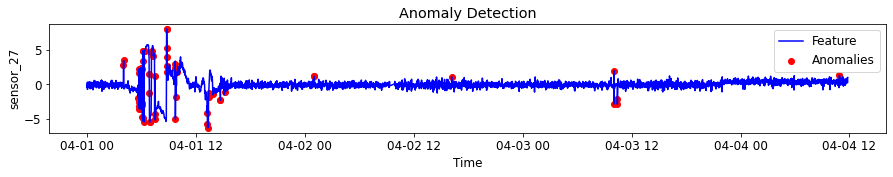

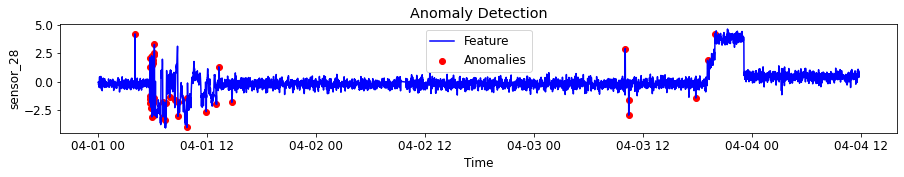

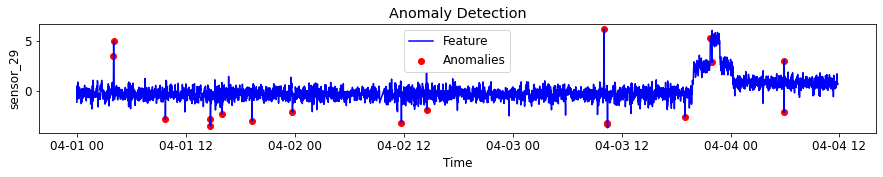

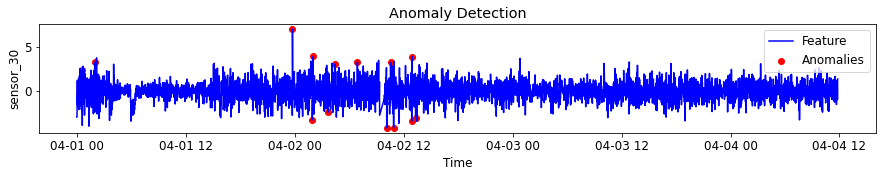

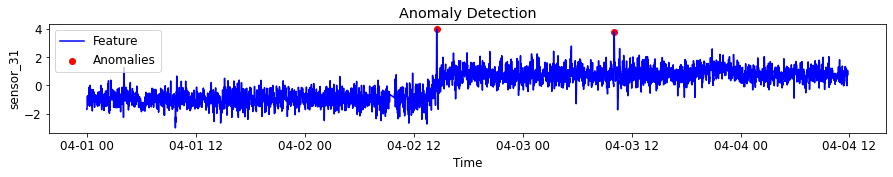

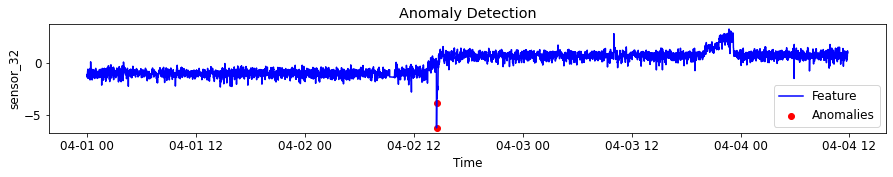

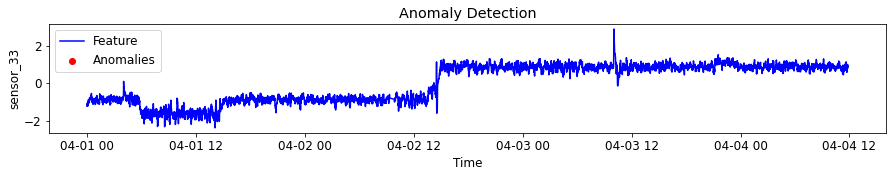

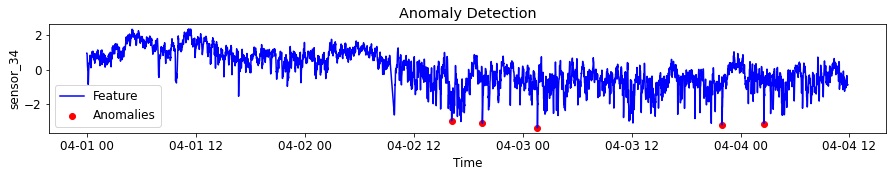

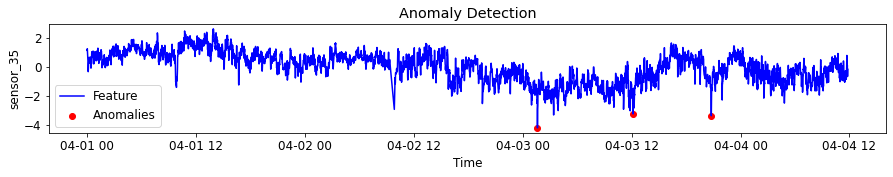

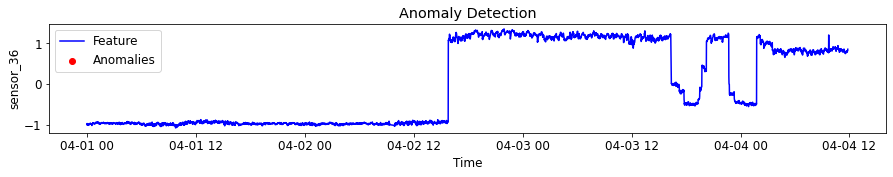

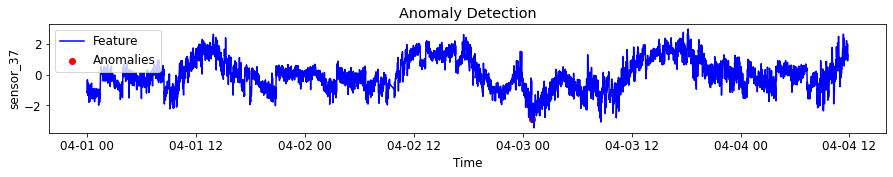

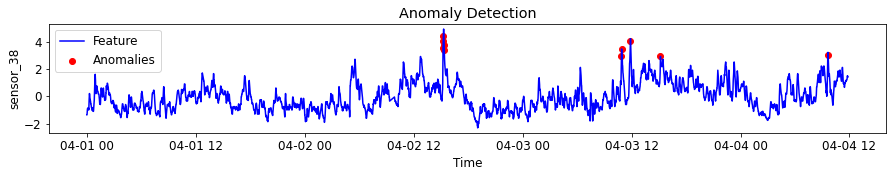

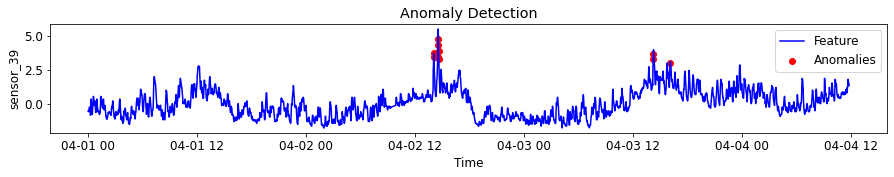

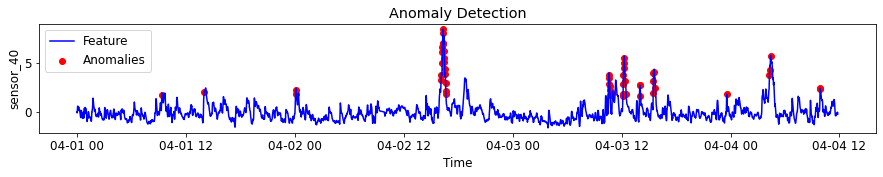

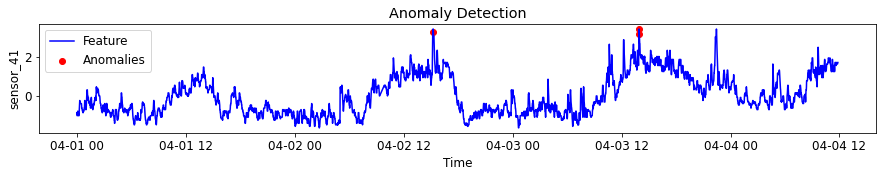

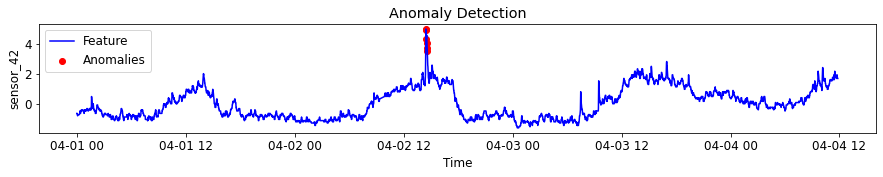

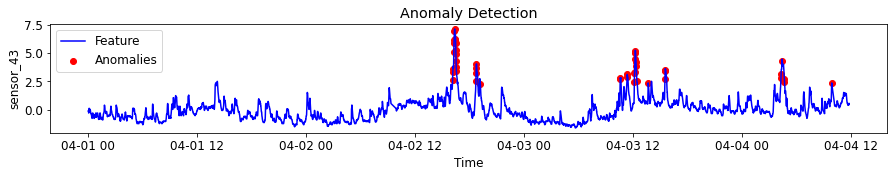

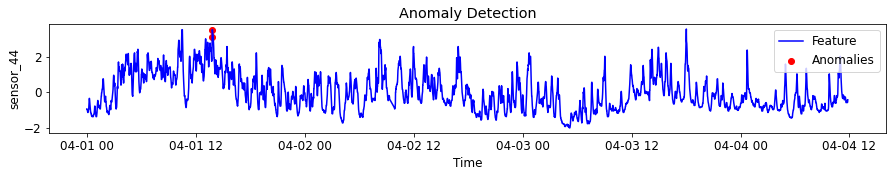

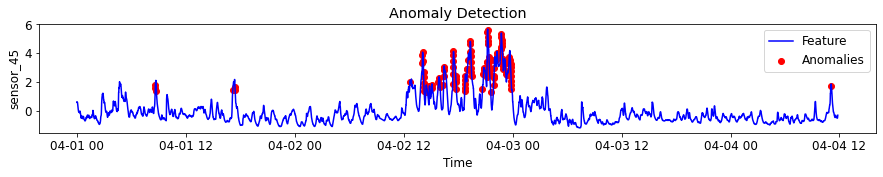

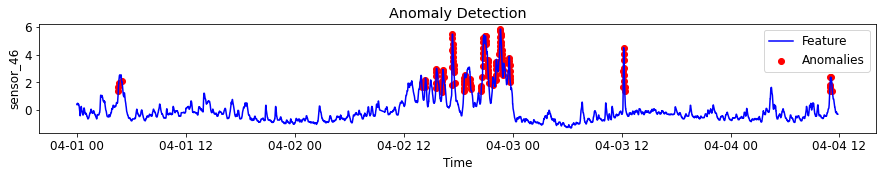

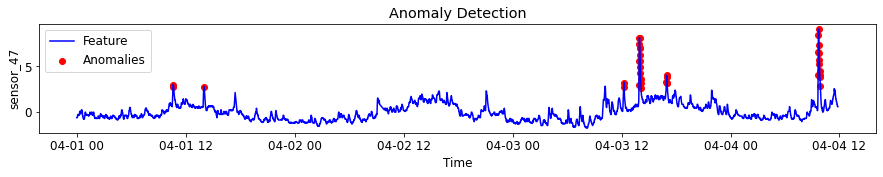

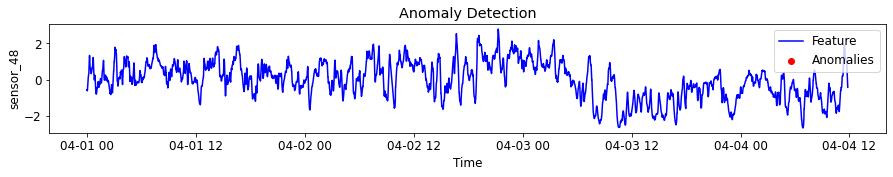

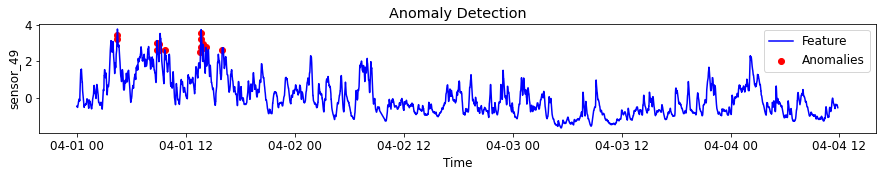

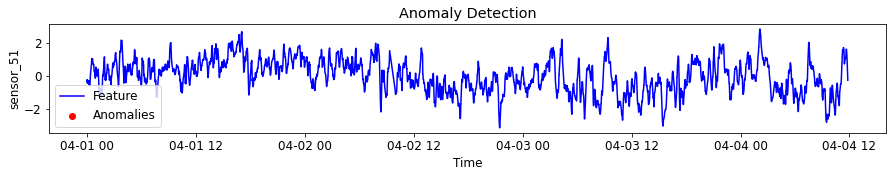

In [47]:
# Assume X_train is your feature data and combined_anomalies is a boolean Series
# Replace column indices with the actual column names if available

for i in range(len(X_train.columns)):
    feature_column = X_train.iloc[:, i]  # Adjust the index or column name
    anomalies = combined_anomalies.iloc[:, i]  # Adjust the index or column name

    # Plot the feature data
    plt.figure(figsize=(15, 2))
    plt.plot(feature_column.index, feature_column.values, label="Feature", color="blue")

    # Overlay anomalies
    plt.scatter(feature_column.index[anomalies], 
                feature_column[anomalies], 
                color="red", label="Anomalies")

    # Add labels and title
    plt.title("Anomaly Detection")
    plt.ylabel(f"{df.columns[i]}")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

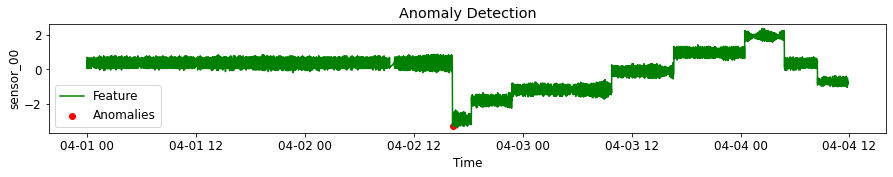

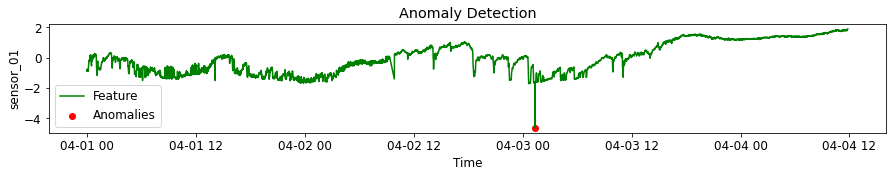

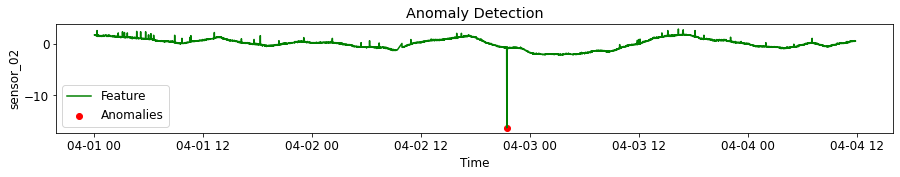

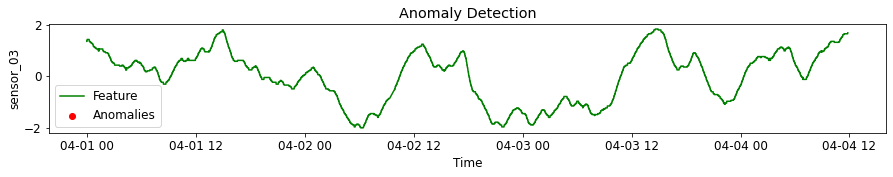

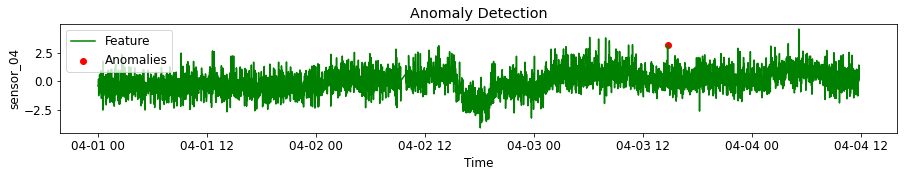

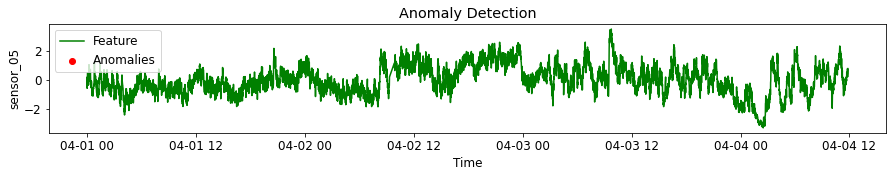

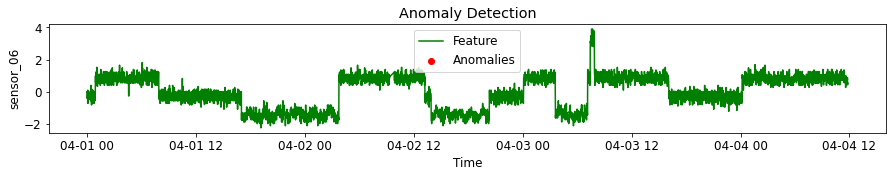

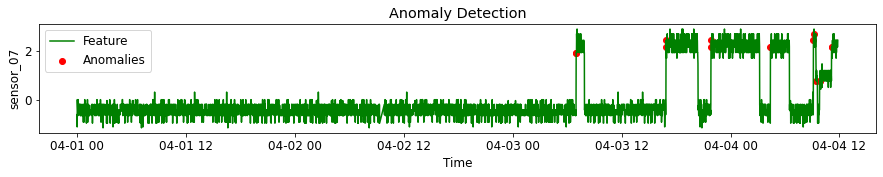

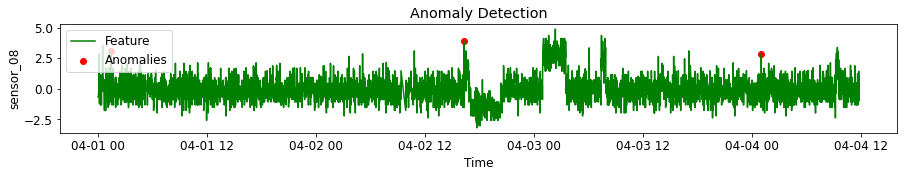

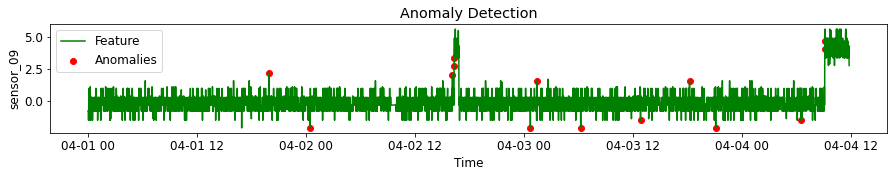

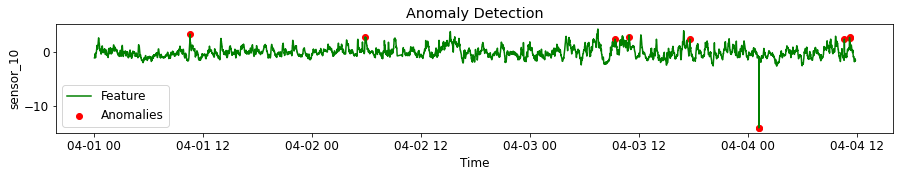

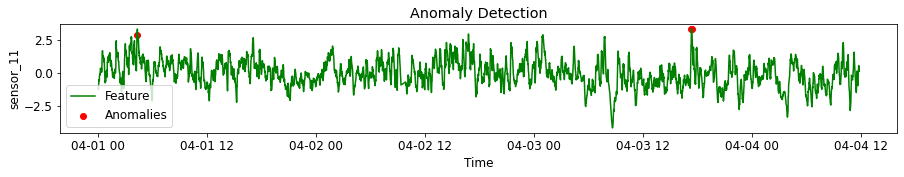

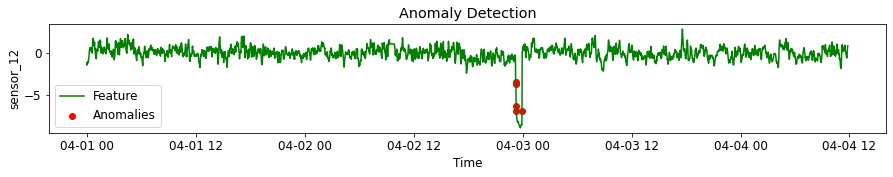

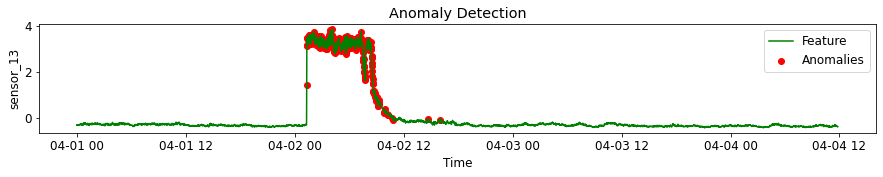

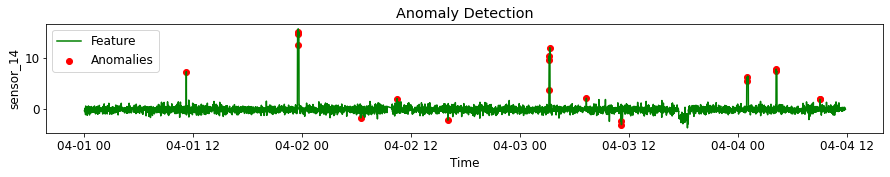

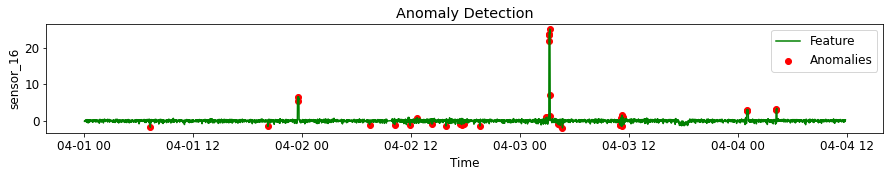

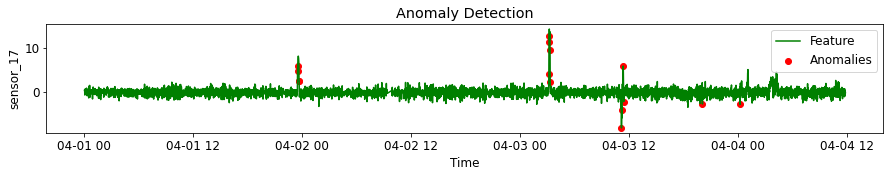

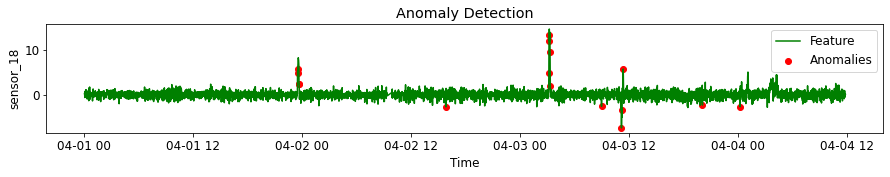

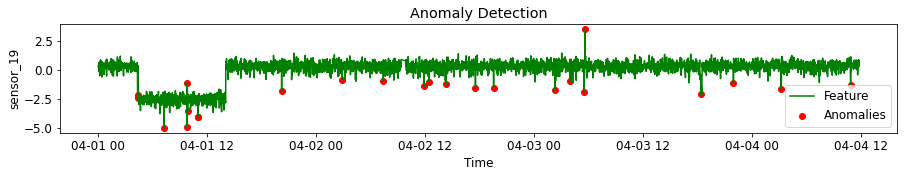

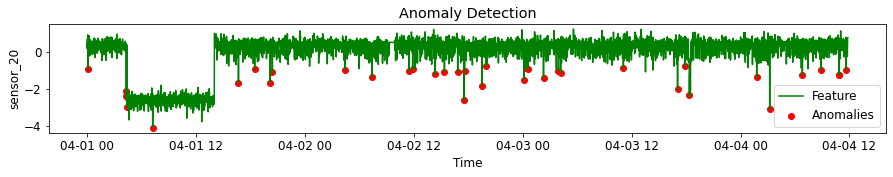

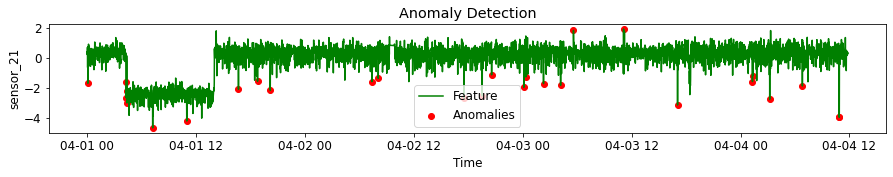

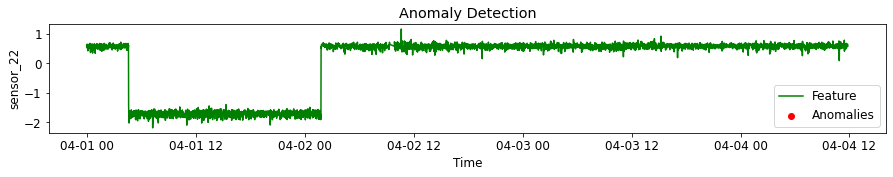

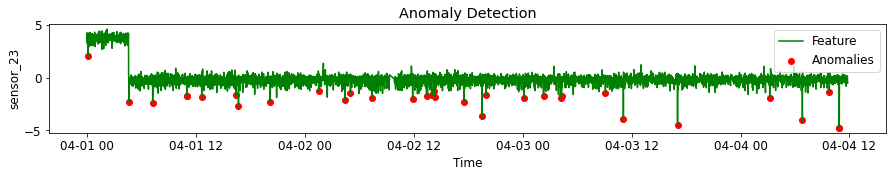

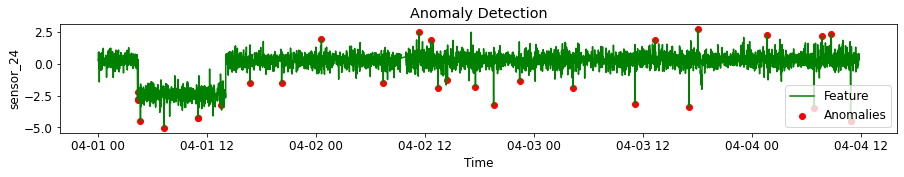

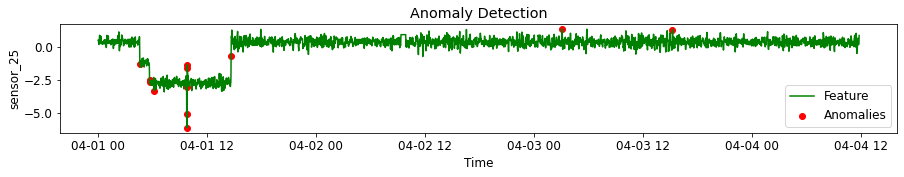

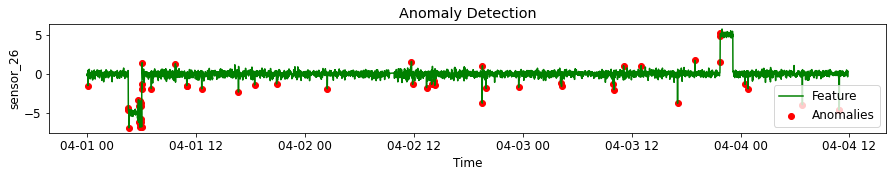

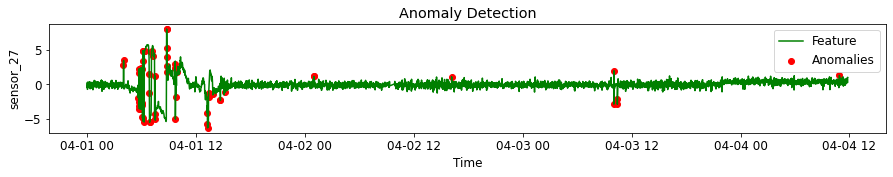

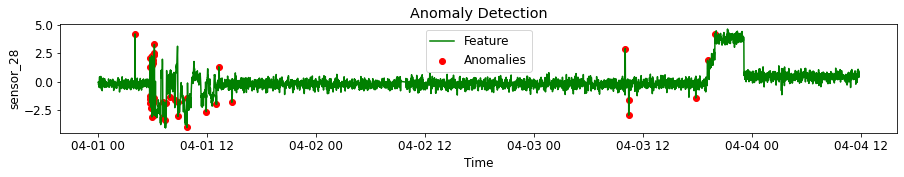

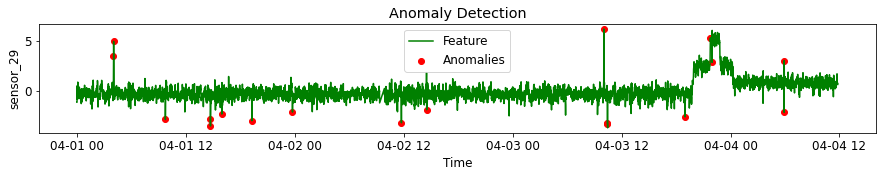

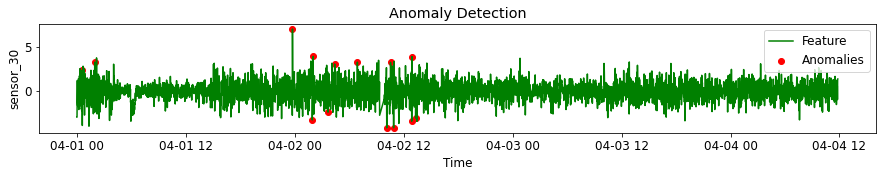

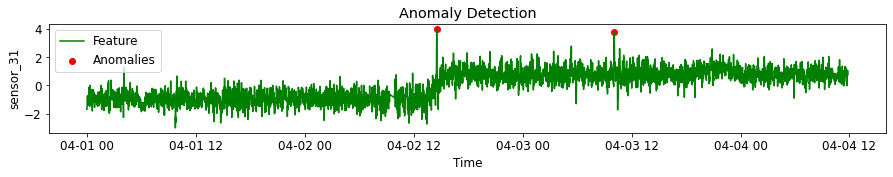

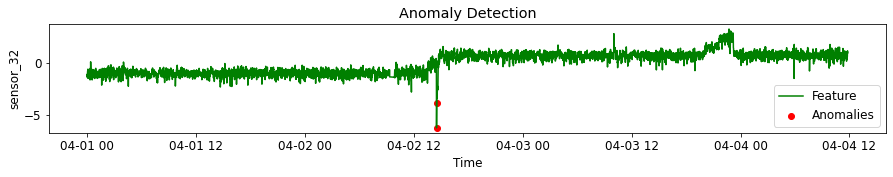

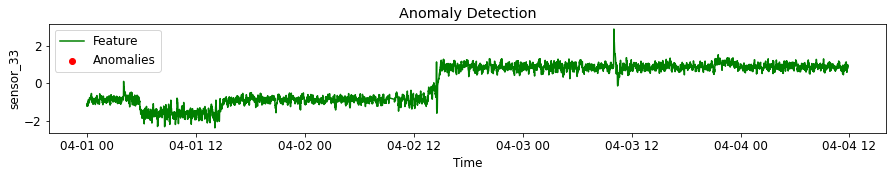

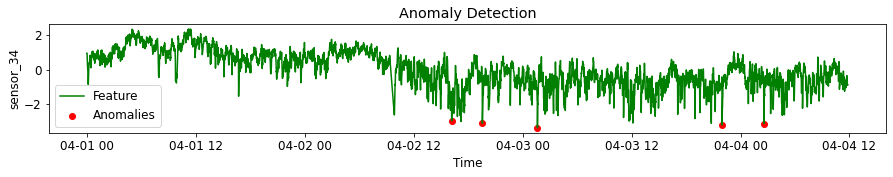

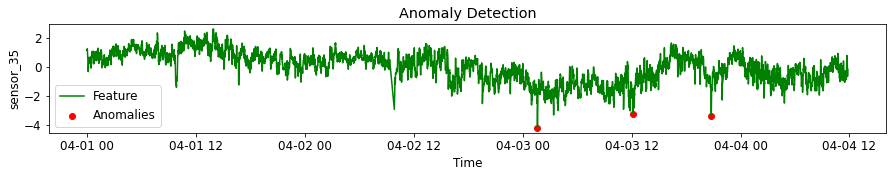

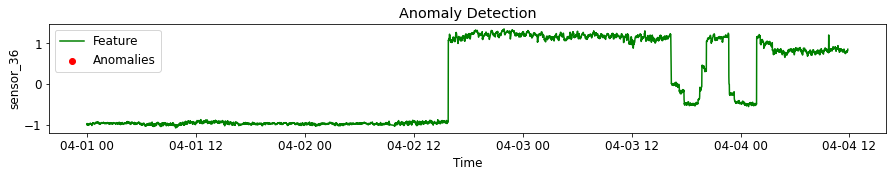

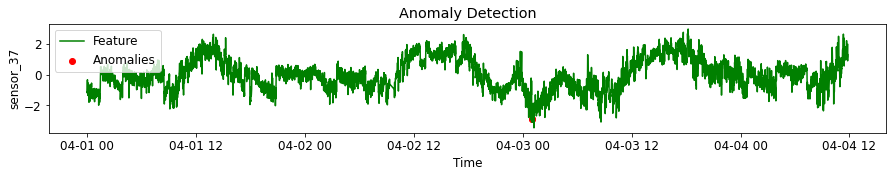

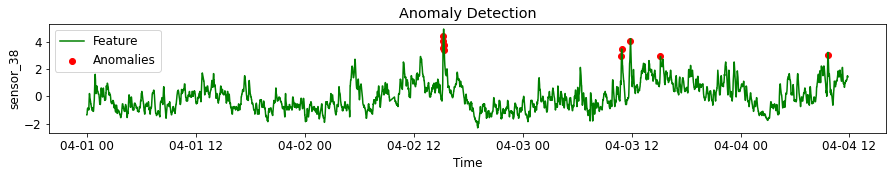

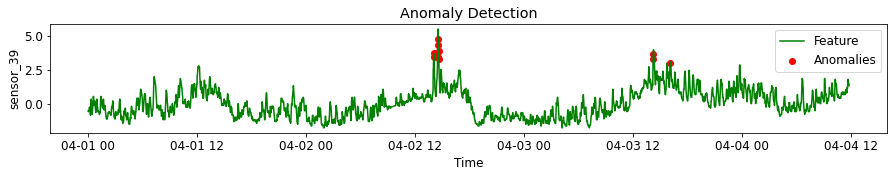

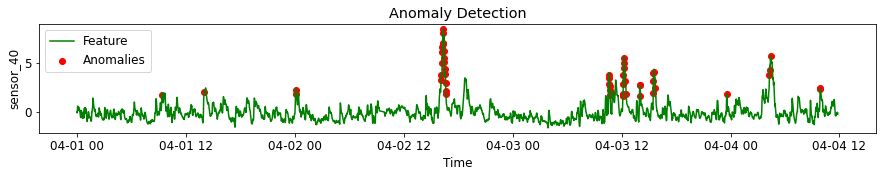

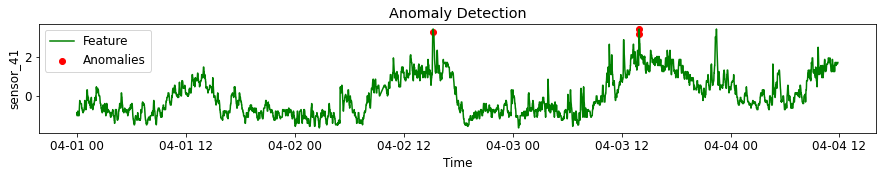

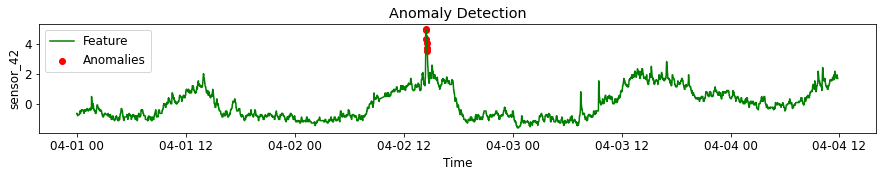

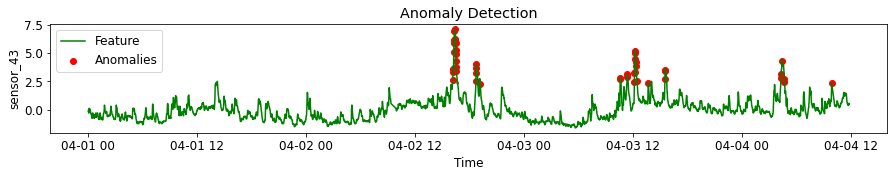

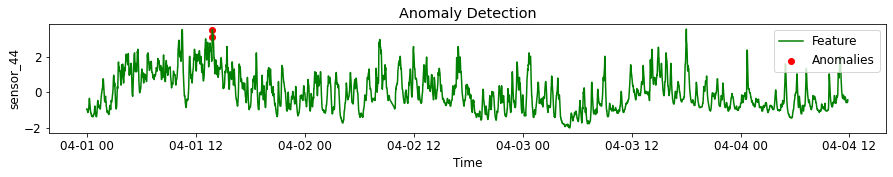

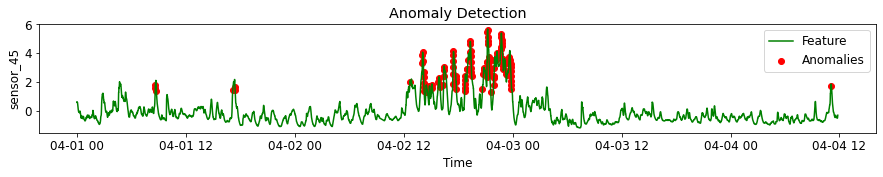

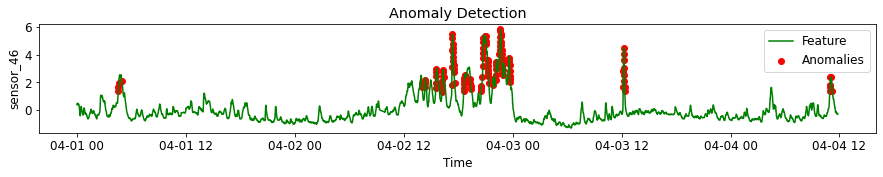

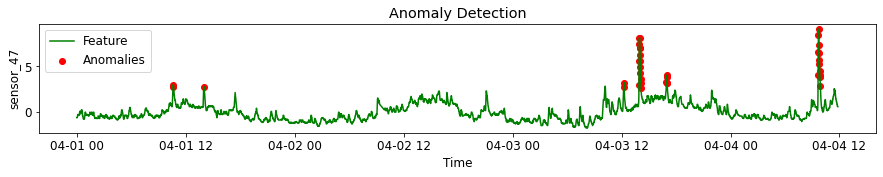

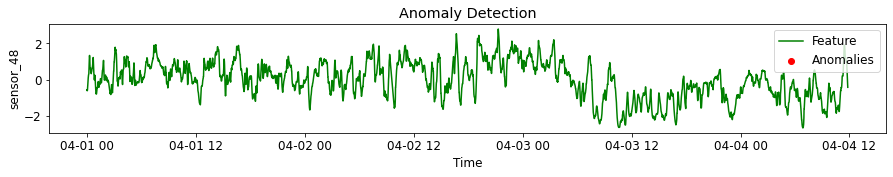

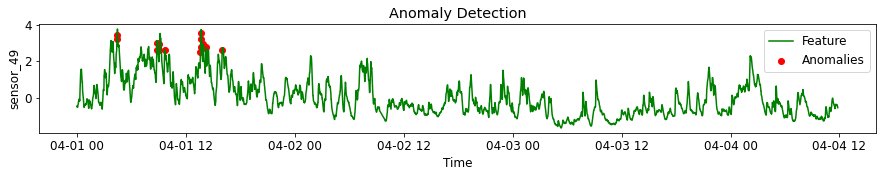

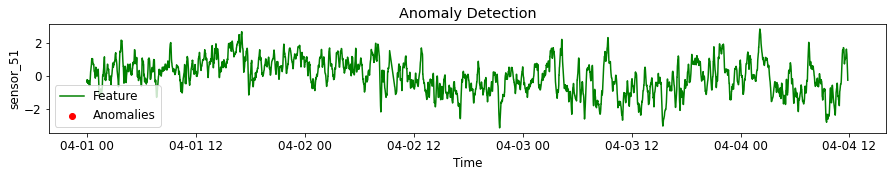

In [48]:
for i in range(len(X_train.columns)):
    feature_column = X_train.iloc[:, i]
    anomalies = combined_anomalies.iloc[:, i]
    # Plot the feature data
    plt.figure(figsize=(15, 2))
    plt.plot(feature_column.index, feature_column.values, label="Feature", color="green")
    # Overlay anomalies
    plt.scatter(feature_column.index[anomalies], feature_column[anomalies], color="red", label="Anomalies")
    plt.title("Anomaly Detection")
    plt.ylabel(f"{df.columns[i]}")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

## Anomaly detection using
<b>1. Isolation Forest<br>
2. K-means clustering<br>
3. PCA<br>
4. Autoencoders<br></b>

### Isolation Forest

In [49]:
df = data.copy()

In [50]:
df = df.iloc[:,:-1]

In [51]:
from sklearn.ensemble import IsolationForest

In [52]:
scaled_data = ss.fit_transform(df)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(scaled_data)

IsolationForest(contamination=0.05, random_state=42)

In [53]:
df['Iso_Anomaly'] = iso_forest.predict(scaled_data)

C:\Users\akpra\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


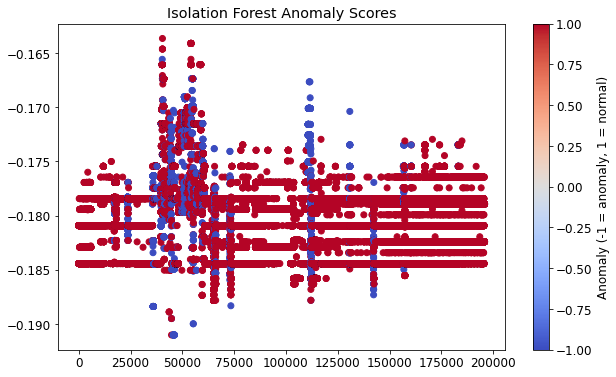

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), iso_forest.decision_function(df.iloc[:,:-1]), c=df['Iso_Anomaly'], cmap='coolwarm')
plt.title('Isolation Forest Anomaly Scores')
plt.colorbar(label='Anomaly (-1 = anomaly, 1 = normal)')
plt.show()

### K-Means

In [55]:
df = data.copy()

In [56]:
df = df.iloc[:,:-1]

In [57]:
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Preprocessing
scaled_data = ss.fit_transform(df)

# Step 2: Train k-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

# Step 3: Anomaly Detection
distances = np.min(kmeans.transform(scaled_data), axis=1)
threshold = distances.mean() + 3 * distances.std()
df['KMeans_Anomaly'] = (distances > threshold).astype(int)

# Evaluation (if TrueLabel is available)
if 'TrueLabel' in df.columns:
    print("k-means Evaluation:")
    print(classification_report(sensor_data['TrueLabel'], sensor_data['KMeans_Anomaly']))

C:\Users\akpra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<AxesSubplot:xlabel='timestamp', ylabel='KMeans_Anomaly'>

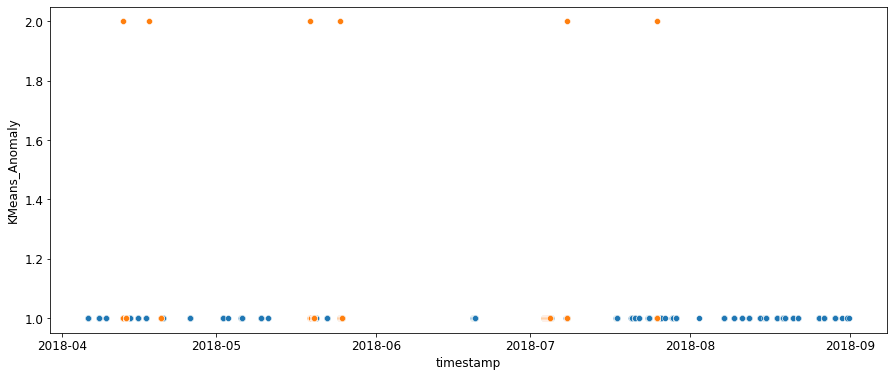

In [58]:
sns.scatterplot(df["KMeans_Anomaly"][df["KMeans_Anomaly"]==1])
sns.scatterplot(y_true[y_true!=0])

### PCA

PCA and Q & T² Metrics are particularly well-suited for multivariate time-series anomaly detection.

In [59]:
df = data.copy()

In [60]:
y = df.iloc[:,-1]
y = y.map({'NORMAL':0, 'RECOVERING':1, 'BROKEN': 2})
df = df.iloc[:,:-1]

In [61]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [62]:
X = ss.fit_transform(df)

In [63]:
from sklearn.decomposition import PCA
pca = PCA()

In [64]:
X_pca = pca.fit_transform(X)

In [65]:
X_pca.shape

(195815, 50)

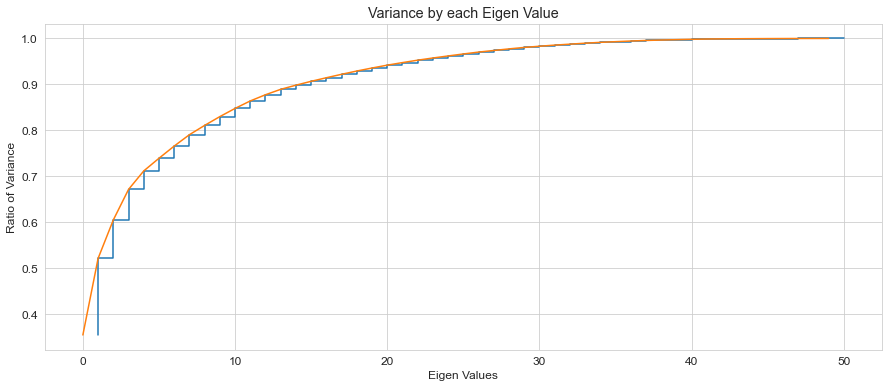

In [66]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,51)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,50)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

Waterfall plot indicates that 20 features are describing about 95% of population data.<br>
Therefore, reducing features from 50 to 20 for reducing overfitting of data and applying PCA.

In [67]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

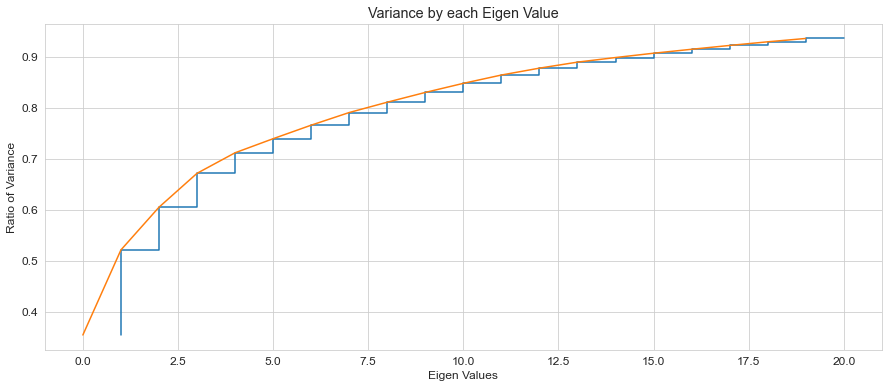

In [68]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,21)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,20)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

Reconstructing the dataset using PCA model and calculating the error & considering 99 percentile of total error as threshold for error detection.

### Q Metrics

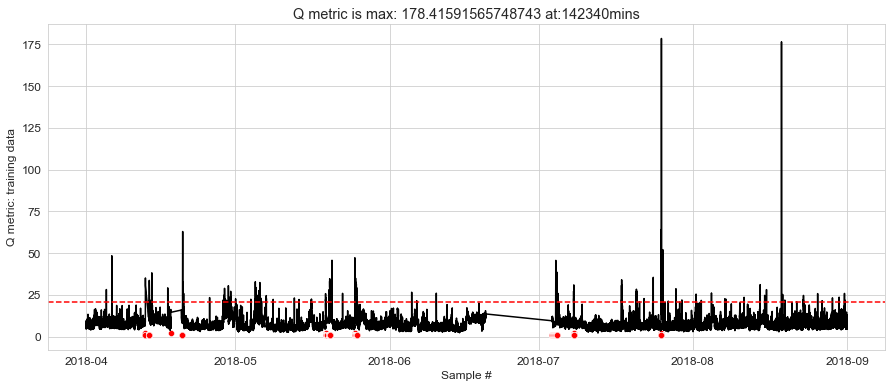

In [69]:
X_reconstructed = np.dot(X_pca,pca.components_)
error_pca = X-X_reconstructed
Q_train = np.sum(np.abs(error_pca),axis=1)
Q_CL = np.percentile(Q_train,99)
Q_train = pd.DataFrame(Q_train)
Q_train.index = df.index
# Q_train plot with CL
plt.figure()
plt.plot(Q_train, color='black')
# plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.axhline(y=Q_CL, color='r', linestyle='--')
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.title(f'Q metric is max: {np.array(Q_train).max()} at:{np.array(Q_train).argmax()}mins')
sns.scatterplot(y[y!=0], color= 'red')
plt.show()

### T$^2$ Metrics

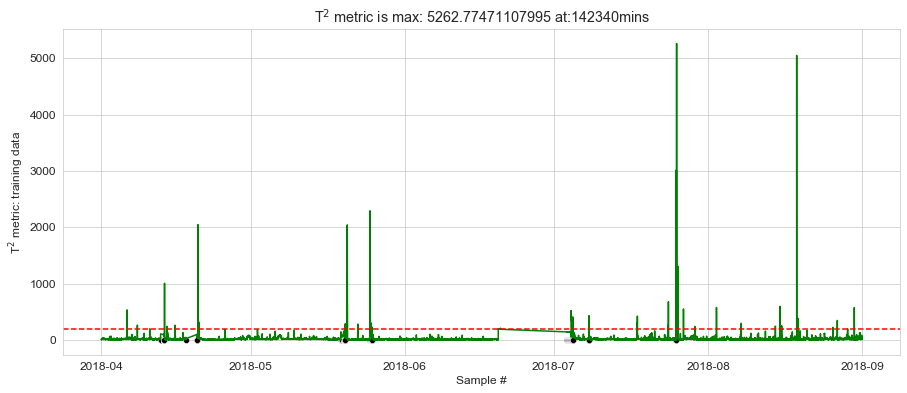

In [70]:
lambda_ = np.diag(pca.explained_variance_)
lambda_inv = np.linalg.inv(lambda_)
T_train = np.zeros(X_pca.shape[0])
for i in range(X_pca.shape[0]):
    T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
T_CL = np.percentile(T_train,99)
T_train = pd.DataFrame(T_train)
T_train.index = df.index
# T2_train plot with CL
plt.figure()
plt.plot(T_train, color='green')
plt.axhline(y=T_CL, color='r', linestyle='--')
sns.scatterplot(y[y!=0], color= 'black')
plt.xlabel('Sample #')
plt.ylabel('T$^2$ metric: training data')
plt.title(f'T$^2$ metric is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
plt.show()

Analysing the trend at the model detects its 1$^s$$^t$ abnormality:

In [71]:
#%% Q contribution
error = np.abs(error_pca).sum(axis=1)
cum = []
for index,value in enumerate(error):
    if (value>Q_CL) and (len(cum)<15):
        previous_val = value
        cum.append(value)
        if len(cum) == 15:
            sample = index
            break
    else:
        cum=[]
# sample = ((pd.Series(error_pca.sum(axis=1))-pd.Series(error_pca.sum(axis=1)).shift()).abs()).argmax()
final_timestamp = df.index[0] + timedelta(minutes=sample)
print('Time-',final_timestamp,'mins')
error_test_sample = error_pca[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

Time- 2018-04-06 03:19:00 mins


Visualizing the maximum deviating sensor tends:

Time- 2018-04-06 03:19:00 mins


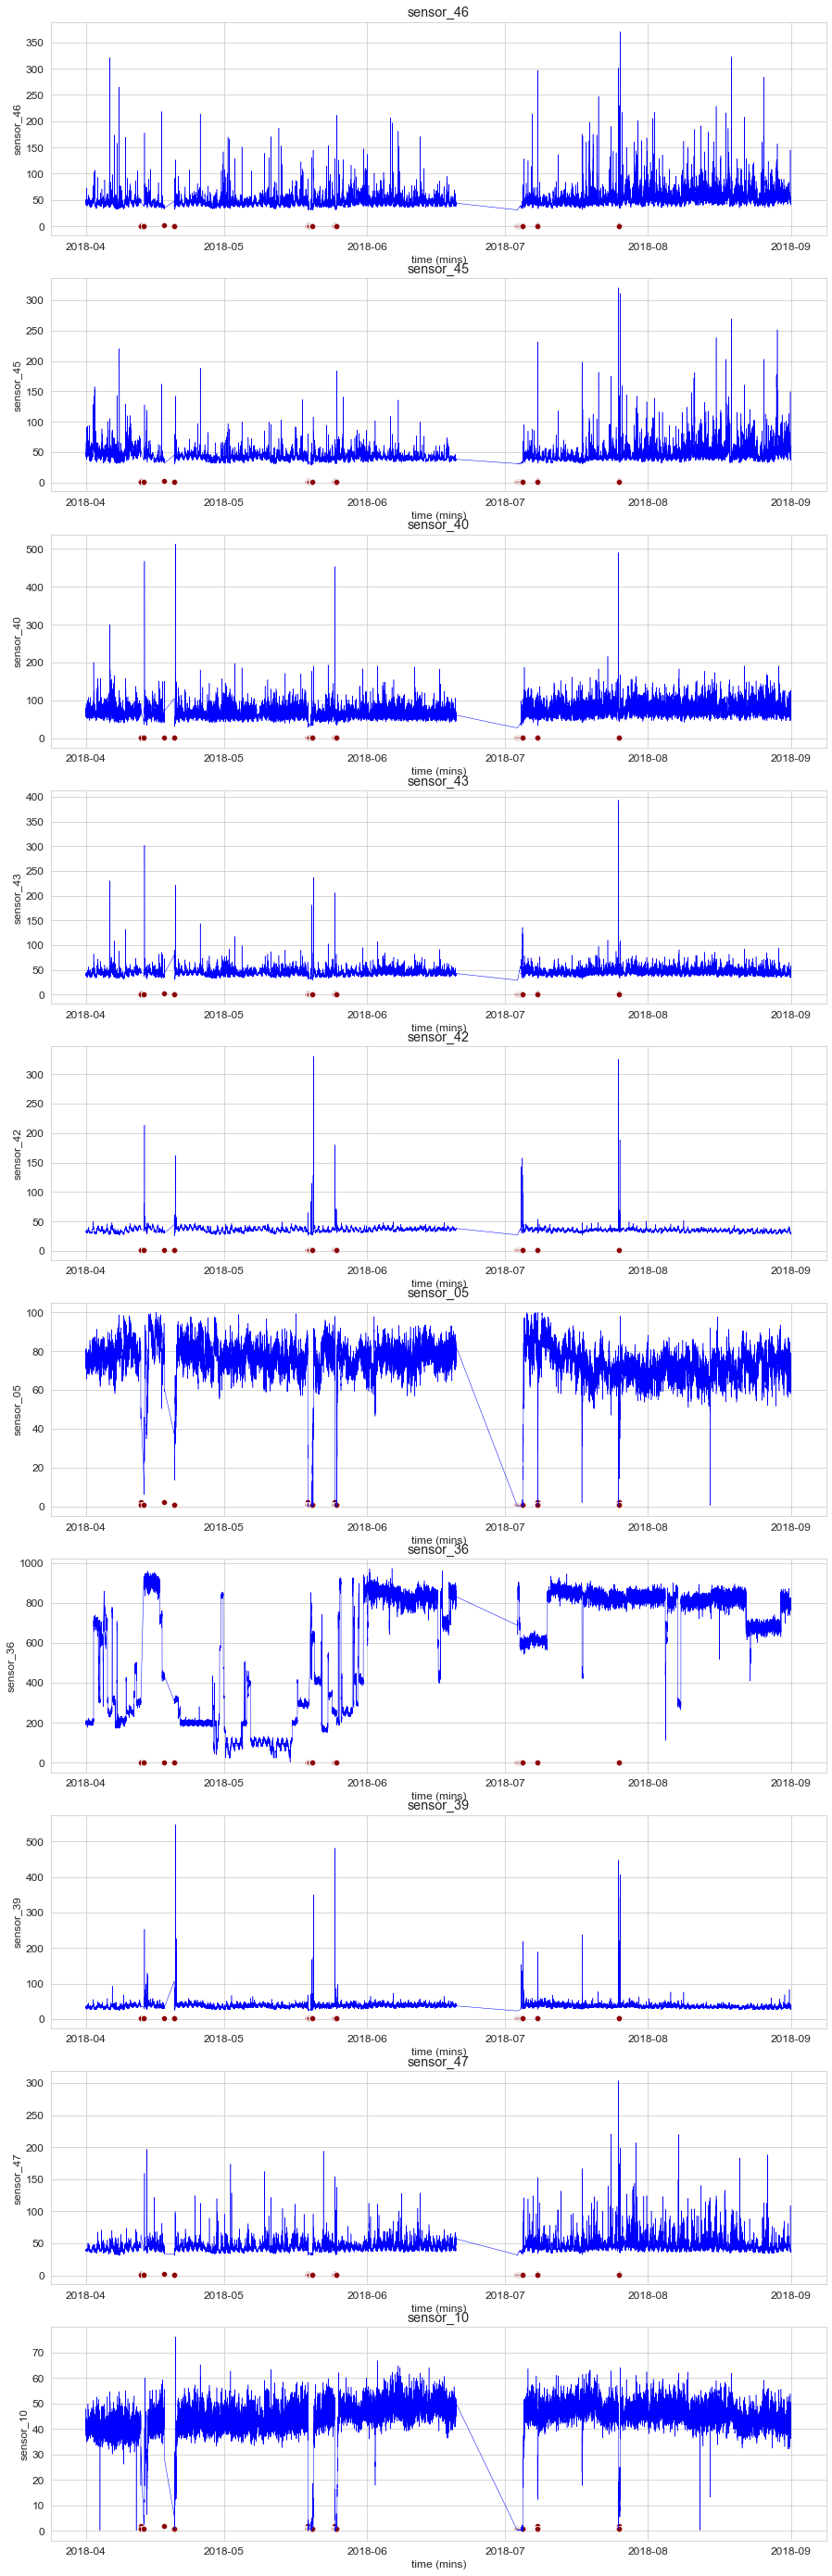

In [72]:
plt.figure(figsize=(15,50))
print('Time-',final_timestamp,'mins')
for i,n in enumerate(np.argsort(Q_contri)[:-11:-1]):
    plt.subplot(10,1,i+1)
    plt.plot(df.iloc[:,n],'blue', linewidth=0.5)
    sns.scatterplot(y[y!=0], color= 'darkred')
    plt.xlabel('time (mins)')
    plt.ylabel(df.columns[n])
    plt.title(df.columns[n])
    plt.show

Compiling Q & T$^2$ metric and calculating the resultant error

In [73]:
Cumm_error = pd.DataFrame(Q_train.values + T_train.values)
Cumm_error.index = df.index

In [74]:
Ce_CL = np.percentile(Cumm_error,99)
Ce_CL

204.0464486466846

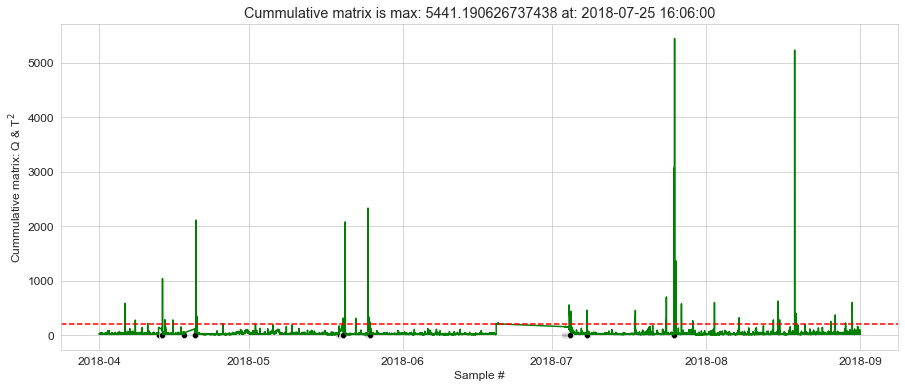

In [75]:
plt.figure()
plt.plot(Cumm_error, color='green')
plt.axhline(y=Ce_CL, color='r', linestyle='--')
sns.scatterplot(y[y!=0], color= 'black')
plt.xlabel('Sample #')
plt.ylabel('Cummulative matrix: Q & T$^2$')
plt.title(f'Cummulative matrix is max: {np.array(Cumm_error).max()} at: {Cumm_error.index[np.array(Cumm_error).argmax()]}')
plt.show()

Visualizing the maximum deviating sensor tends:<br>
Overlaying true labels with anomaly scores validates unsupervised models.

Time- 2018-07-25 16:06:00 mins


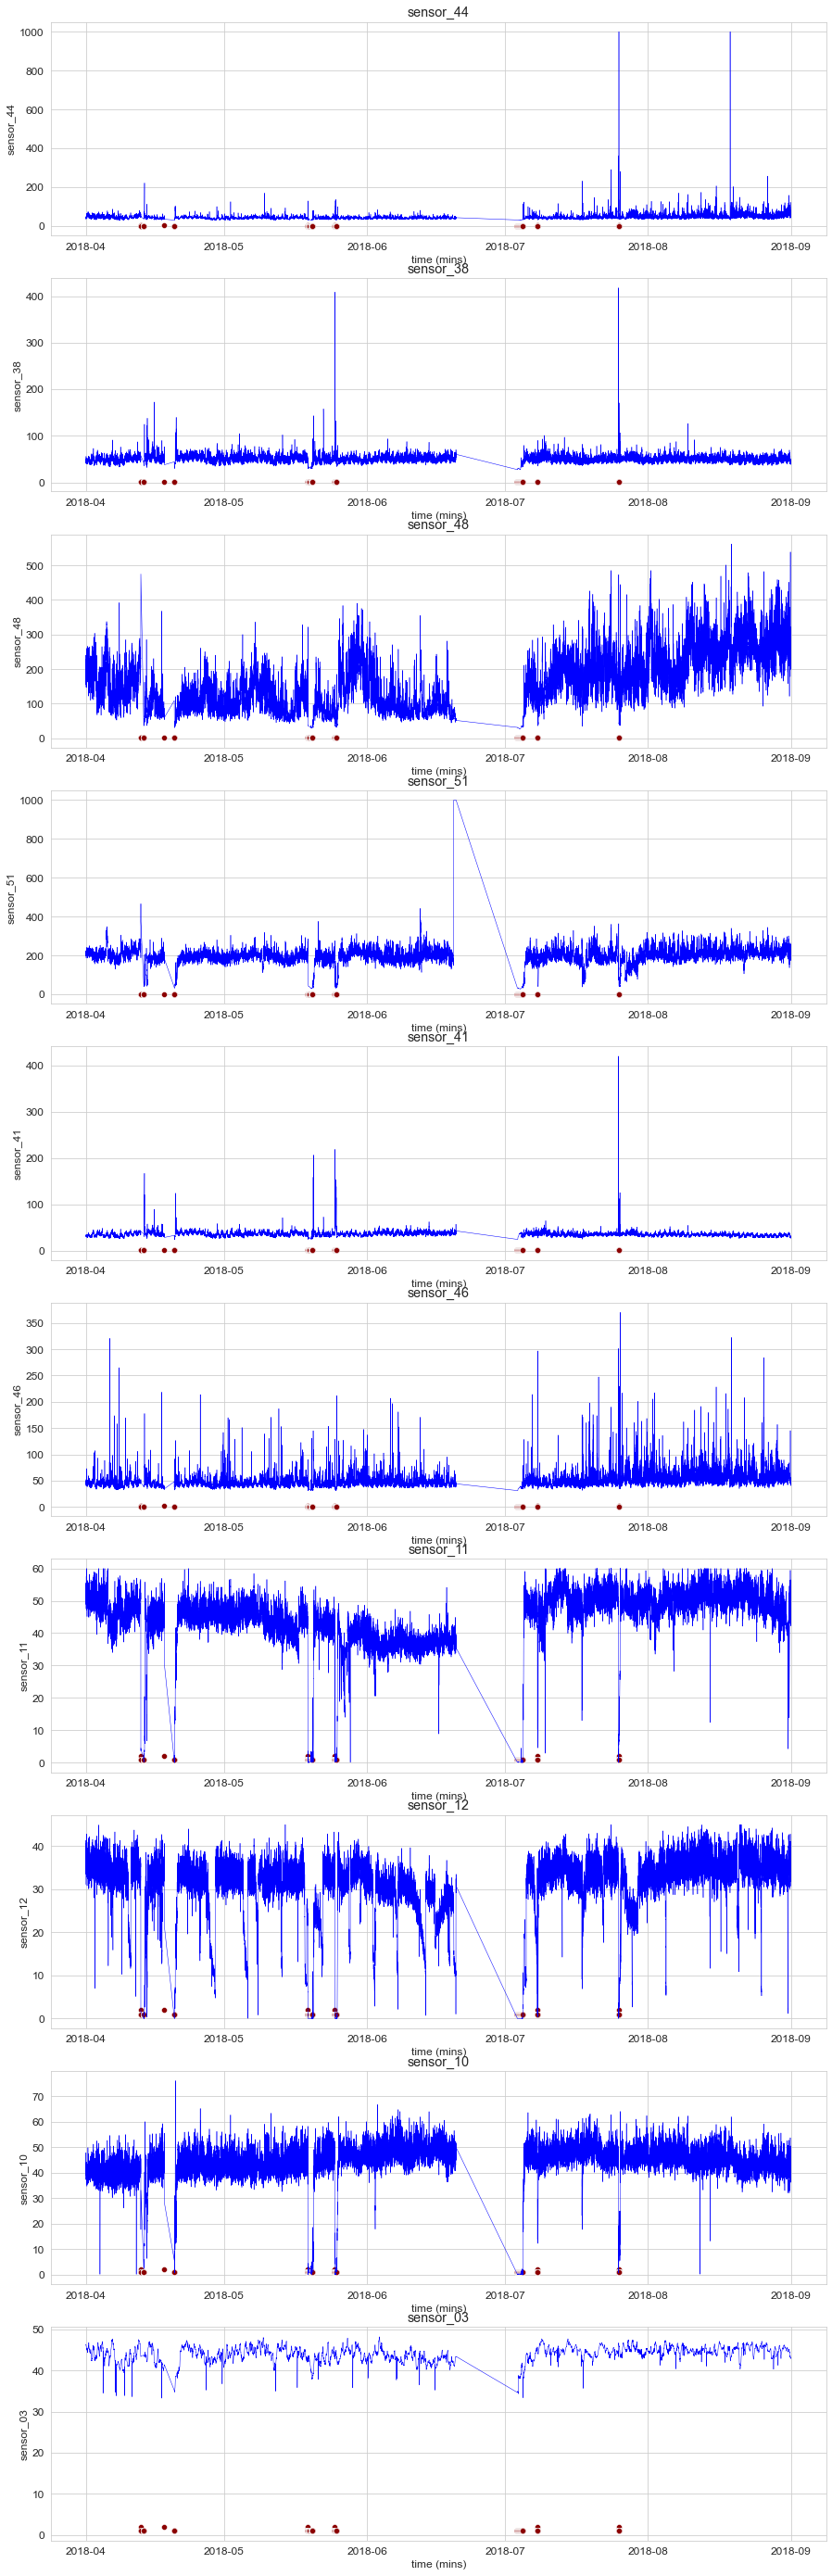

In [76]:
plt.figure(figsize=(15,50))
print('Time-',Cumm_error.index[np.array(Cumm_error).argmax()],'mins')
for i,n in enumerate(np.argsort(error_pca[np.array(Cumm_error).argmax()])[:-11:-1]):
    plt.subplot(10,1,i+1)
    plt.plot(df.iloc[:,n],'blue', linewidth=0.5)
    sns.scatterplot(y[y!=0], color= 'darkred')
    plt.xlabel('time (mins)')
    plt.ylabel(df.columns[n])
    plt.title(df.columns[n])
    plt.show

### Autoencoders

Autoencoders can model normal behavior well and flag deviations as anomalies.

In [77]:
df = data.copy()

In [78]:
df = df[df['machine_status']=='NORMAL']

In [79]:
df = df.iloc[:30000,:-1]

Epoch 1/50
750/750 [==============================] - 5s 4ms/step - loss: 0.2591 - val_loss: 0.1198
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0921 - val_loss: 0.0756
Epoch 3/50
750/750 [==============================] - 3s 3ms/step - loss: 0.0624 - val_loss: 0.0567
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0483 - val_loss: 0.0455
Epoch 5/50
750/750 [==============================] - 3s 3ms/step - loss: 0.0399 - val_loss: 0.0375
Epoch 6/50
750/750 [==============================] - 3s 3ms/step - loss: 0.0340 - val_loss: 0.0335
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0301 - val_loss: 0.0299
Epoch 8/50
750/750 [==============================] - 3s 3ms/step - loss: 0.0273 - val_loss: 0.0271
Epoch 9/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0250 - val_loss: 0.0253
Epoch 10/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0236 - val_loss: 0.0276

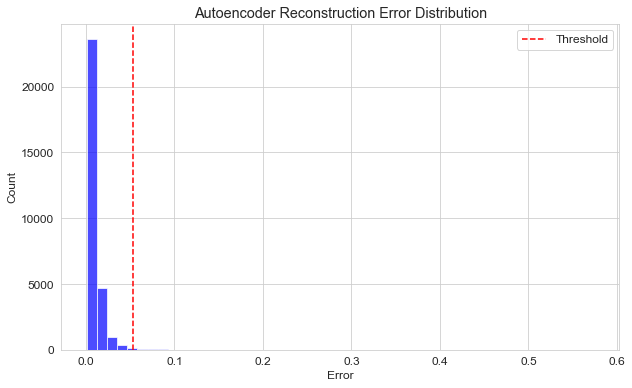

In [80]:
import tensorflow as tf

# Step 1: Preprocessing
scaled_data = ss.fit_transform(df)
X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Step 2: Define Autoencoder Model
input_dim = X_train.shape[1]
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=input_dim),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Step 3: Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

# Step 4: Detect Anomalies
reconstructed = autoencoder.predict(scaled_data)
reconstruction_error = ((scaled_data - reconstructed) ** 2).mean(axis=1)

# Set threshold for anomalies
threshold = reconstruction_error.mean() + 3 * reconstruction_error.std()
df['Autoencoder_Anomaly'] = (reconstruction_error > threshold).astype(int)

# Step 6: Visualize Reconstruction Error
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, color='blue', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title('Autoencoder Reconstruction Error Distribution')
plt.xlabel('Error')
plt.ylabel('Count')
plt.legend()
plt.show()

In [81]:
from IPython.display import clear_output

In [82]:
error_ae = []
for i in range(scaled_data.shape[0]):
    y_pred = autoencoder.predict(scaled_data[i].reshape(1,50), verbose = None)
    error_ae.append(np.abs((scaled_data[0]-y_pred[0])).sum())
    clear_output(wait=True)
    print(i,"/",scaled_data.shape[0])
# AE_CL = np.percentile(error_ae,95)

29999 / 30000


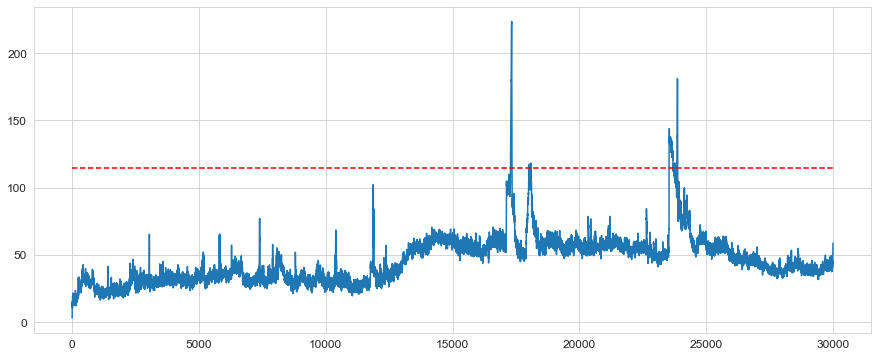

In [83]:
AE_CL = np.percentile(error_ae,99)
pd.Series(error_ae).plot()
plt.hlines(AE_CL,0,len(error_ae),colors='red',linestyles='--')
plt.show()

In [84]:
df = data.copy()
val_data = df[df['machine_status']!='NORMAL'].iloc[:,:-1]
val_data = pd.concat([df.iloc[:30000,:-1],val_data],axis=0)
val_data = val_data.sort_index()
scaled_data = ss.fit_transform(val_data)

In [85]:
error_ae = []
for i in range(scaled_data.shape[0]):
    y_pred = autoencoder.predict(scaled_data[i].reshape(1,50), verbose = None)
    error_ae.append(np.abs((scaled_data[0]-y_pred[0])).sum())
    clear_output(wait=True)
    print(i,"/",scaled_data.shape[0])

33045 / 33046


In [86]:
error_ae = pd.DataFrame(error_ae)
error_ae.index = val_data.index

Overlaying true labels with anomaly scores validates unsupervised models.

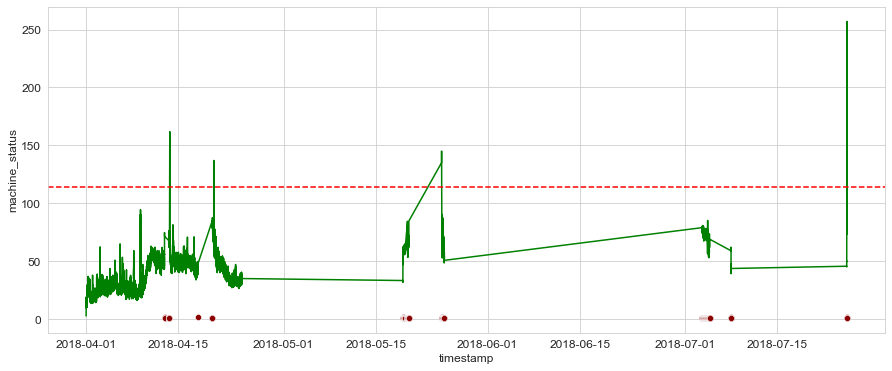

In [87]:
plt.plot(error_ae, color='green')
plt.axhline(y=AE_CL, color='r', linestyle='--')
sns.scatterplot(y[y!=0], color= 'darkred')
plt.show()

## Conclusion

The models demonstrate a comprehensive approach to predictive maintenance, allowing for early detection of pump abnormalities. This can help reduce downtime, optimize operations, and improve overall system reliability.